## **Library Imports and Environment Setup**


In [2]:

import numpy as np
import pandas as pd
from PIL import Image
import torch
import os

import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [ ]:
!unzip archive.zip

Archive:  archive.zip
   creating: archive/
  inflating: __MACOSX/._archive      
   creating: archive/valid/
  inflating: __MACOSX/archive/._valid  
  inflating: archive/.DS_Store       
  inflating: __MACOSX/archive/._.DS_Store  
   creating: archive/train/
  inflating: __MACOSX/archive/._train  
  inflating: archive/valid/c--183-_jpg.rf.30414448e73fa023ce6bdf5cc8e536de.jpg  
  inflating: __MACOSX/archive/valid/._c--183-_jpg.rf.30414448e73fa023ce6bdf5cc8e536de.jpg  
  inflating: archive/valid/c--38-_jpg.rf.6f6d22e248524cc394c14c605ee83238.jpg  
  inflating: __MACOSX/archive/valid/._c--38-_jpg.rf.6f6d22e248524cc394c14c605ee83238.jpg  
  inflating: archive/valid/c--71-_jpg.rf.b1cc381d982d258583014caf2cdc3a35.jpg  
  inflating: __MACOSX/archive/valid/._c--71-_jpg.rf.b1cc381d982d258583014caf2cdc3a35.jpg  
  inflating: archive/valid/f--138-_jpg.rf.072ce3b77221d1e986b6a16cdb665dd1.jpg  
  inflating: __MACOSX/archive/valid/._f--138-_jpg.rf.072ce3b77221d1e986b6a16cdb665dd1.jpg  
  inflating:

In [3]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('data/images'):
    print(os.path.join(dirname))

data/images
data/images/valid
data/images/train


## **Data Loading**


In [4]:
def get_data(path):
    images = []
    filename = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.jpg'):
                file_path = os.path.join(root, file)
                img = Image.open(file_path)
                images.append(img)
                filename.append(file)
            if file.endswith('.csv'):
                file_path = os.path.join(root, file)
                df = pd.read_csv(file_path)
    return images, filename, df

In [5]:
train_dir = 'data/images/train'
val_dir = 'data/images/valid'

In [6]:
# Get all images
train_img, train_filename, train_df = get_data(train_dir)
valid_img, val_filename, val_df = get_data(val_dir)

len(train_img), len(train_filename),len(train_df), len(valid_img), len(val_filename), len(val_df)

(577, 577, 5425, 204, 204, 1701)

Training: 577 images, 5425 annotation.  
Validation: 204 images, 1701 annotation.

In [7]:
val_df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,c--188-_jpg.rf.df8c04f880e507f44d63d74b701f381...,563,537,Microplastic,271,15,305,46
1,c--188-_jpg.rf.df8c04f880e507f44d63d74b701f381...,563,537,Microplastic,348,265,402,308
2,c--188-_jpg.rf.df8c04f880e507f44d63d74b701f381...,563,537,Microplastic,146,279,181,317
3,c--188-_jpg.rf.df8c04f880e507f44d63d74b701f381...,563,537,Microplastic,477,302,542,367
4,f--28-_jpg.rf.de4fc5ebba3bbc0baea64e669225c7c5...,563,537,Microplastic,279,137,337,205


## **Data Exploration**


In [8]:
val_unique_filename = val_df["filename"].unique()
train_unique_filename = train_df["filename"].unique()

len(train_unique_filename), len(val_unique_filename)

(577, 204)

In [9]:
def check_correpondance_filename(unique_filename, base_filename):
    for filename in unique_filename:
        if filename not in base_filename:
            # print a filename if is not in the folder valid  
            print(filename)

In [10]:
check_correpondance_filename(val_unique_filename, val_filename)

In [11]:
check_correpondance_filename(train_unique_filename, train_filename)

In [12]:
val_unique_width = val_df["width"].unique()
val_unique_height = val_df["height"].unique()
train_unique_width = train_df["width"].unique()
train_unique_height = train_df["height"].unique()
len(train_unique_width), len(train_unique_height), len(val_unique_width), len(val_unique_height)

(2, 2, 1, 1)

In [13]:
def check_the_img_size(folder):
    for img in folder:
        # print only if there is another size
        if img.size != (563, 537):
            print(img.size)

In [14]:
check_the_img_size(train_img)

(353, 336)
(353, 336)
(353, 336)
(353, 336)


In [15]:
print(len(train_img))
train_img = [img for img in train_img if img.size == (563, 537)]
print(len(train_img))

577
573


In [16]:
def plot_bounding_boxes_on_img(dir_name, filename, df):
    
    # Groupby file name  
    grouped = df.groupby('filename')
    df_grouped_by_filename = grouped.get_group(filename)
    
    # Read image 
    print(dir_name)
    print(filename)
    img = plt.imread(os.path.join(dir_name, filename))

    # Get dimensions
    height, width = img.shape[:2]

    # Create figure 
    fig, ax = plt.subplots(1)

    # Display image
    ax.imshow(img)

    for xmin, ymin, xmax, ymax in zip(df_grouped_by_filename["xmin"], df_grouped_by_filename["ymin"],df_grouped_by_filename["xmax"], df_grouped_by_filename["ymax"]):
        # Create a Rectangle patch
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

    plt.show()

data/images/valid
c--183-_jpg.rf.30414448e73fa023ce6bdf5cc8e536de.jpg


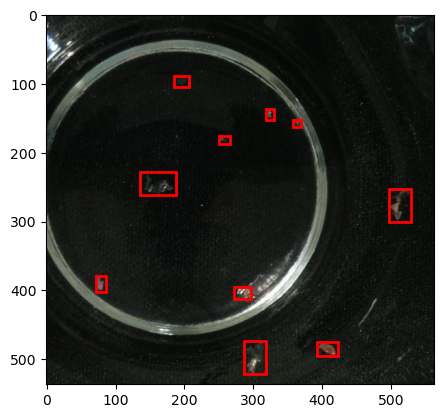

In [17]:
plot_bounding_boxes_on_img(val_dir, val_filename[0], val_df)

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 406.6 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.6/871.6 kB 2.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.0 MB/s eta 0:00:00a 0:00:01


## **Prepare the Dataset for YOLO**
class_id center_x center_y width height


In [ ]:
import os

def convert_to_yolo_format(df, path_to_save):
    for index, row in df.iterrows():
        filename = row['filename'].replace('.jpg', '.txt')
        filepath = os.path.join(path_to_save, filename)
        
        with open(filepath, 'a') as f:
            # YOLO expects normalized values
            width = row['width']
            height = row['height']
            x_center = (row['xmin'] + row['xmax']) / 2 / width
            y_center = (row['ymin'] + row['ymax']) / 2 / height
            bbox_width = (row['xmax'] - row['xmin']) / width
            bbox_height = (row['ymax'] - row['ymin']) / height
            
            # Assuming class_id is 0 since you didn't mention it
            f.write(f"0 {x_center} {y_center} {bbox_width} {bbox_height}\n")

# Create directories for YOLO labels
os.makedirs('data/labels/train', exist_ok=True)
os.makedirs('data/labels/valid', exist_ok=True)

# Convert training and validation datasets
convert_to_yolo_format(train_df, 'data/labels/train')
convert_to_yolo_format(val_df, 'data/labels/valid')

In [18]:
if torch.backends.mps.is_available():
   mps_device = torch.device("mps")
   x = torch.ones(1, device=mps_device)
   print (x)
else:
   print ("MPS device not found.")

tensor([1.], device='mps:0')


In [19]:
from ultralytics import YOLO

In [20]:
# Load the trained YOLO model
prtrained_model_path = 'runs/detect/train4_image_size_increasing+/weights/best.pt' 
pretrained_model = YOLO(prtrained_model_path)  # Load the model


In [20]:
# Make predictions on validation images
for img_path in val_filename[:5]:  
    img_full_path = os.path.join(val_dir, img_path)
    results = pretrained_model.predict(source=img_full_path, device=mps_device, save=True)
    
    # Iterate over the list of results
    for result in results:
        # Show the predictions for each image
        result.show()

        # Print detailed information about the predictions
        print(result)



image 1/1 /Users/abdullah/Desktop/Abha hackathon/data/images/valid/c--183-_jpg.rf.30414448e73fa023ce6bdf5cc8e536de.jpg: 1248x1280 6 Microplastics, 313.4ms
Speed: 22.6ms preprocess, 313.4ms inference, 125.5ms postprocess per image at shape (1, 3, 1248, 1280)
Results saved to runs/detect/predict
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Microplastic'}
obb: None
orig_img: array([[[17, 21, 16],
        [22, 26, 21],
        [30, 34, 29],
        ...,
        [20, 22, 16],
        [23, 25, 19],
        [26, 28, 22]],

       [[22, 26, 21],
        [25, 29, 24],
        [30, 34, 29],
        ...,
        [20, 22, 16],
        [23, 25, 19],
        [26, 28, 22]],

       [[29, 33, 28],
        [28, 32, 27],
        [29, 33, 28],
        ...,
        [25, 27, 21],
        [28, 30, 24],
        [31, 33, 27]],

       ...,

       [[22, 25, 23],
        [ 7, 10,  8],
        [23, 26, 24],
  


image 1/1 /Users/abdullah/Desktop/Abha hackathon/data/images/valid/c--183-_jpg.rf.30414448e73fa023ce6bdf5cc8e536de.jpg: 1248x1280 6 Microplastics, 255.3ms
Speed: 18.9ms preprocess, 255.3ms inference, 138.9ms postprocess per image at shape (1, 3, 1248, 1280)


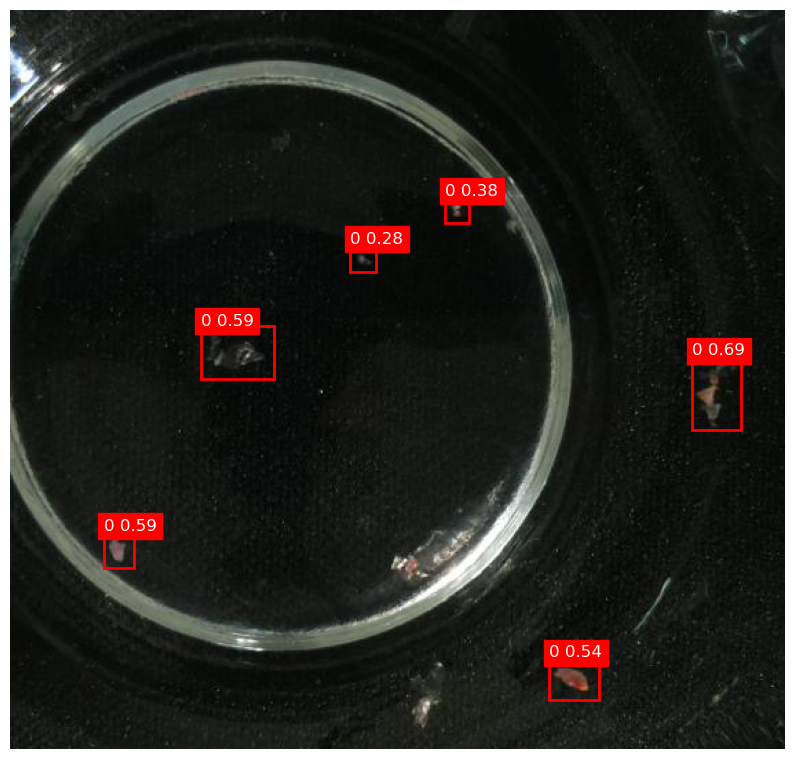


image 1/1 /Users/abdullah/Desktop/Abha hackathon/data/images/valid/c--38-_jpg.rf.6f6d22e248524cc394c14c605ee83238.jpg: 1248x1280 7 Microplastics, 73.2ms
Speed: 6.1ms preprocess, 73.2ms inference, 68.8ms postprocess per image at shape (1, 3, 1248, 1280)


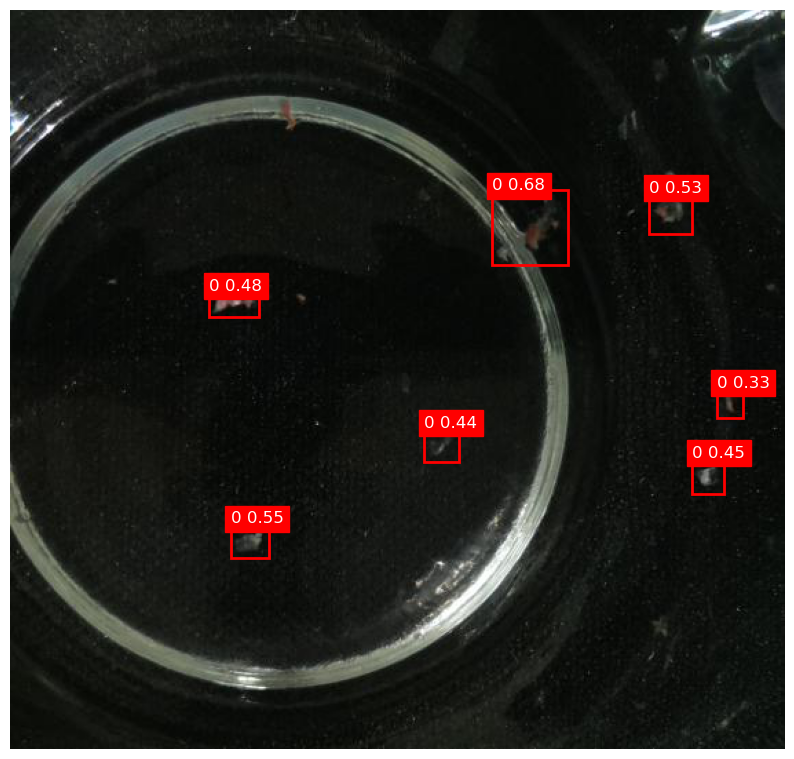


image 1/1 /Users/abdullah/Desktop/Abha hackathon/data/images/valid/c--71-_jpg.rf.b1cc381d982d258583014caf2cdc3a35.jpg: 1248x1280 11 Microplastics, 29.7ms
Speed: 6.2ms preprocess, 29.7ms inference, 75.2ms postprocess per image at shape (1, 3, 1248, 1280)


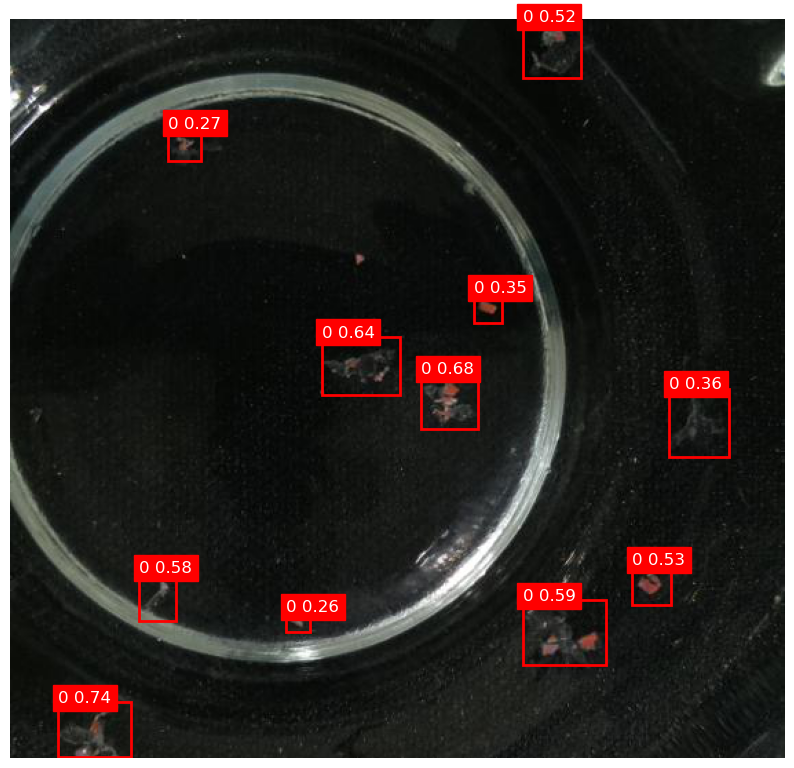


image 1/1 /Users/abdullah/Desktop/Abha hackathon/data/images/valid/f--138-_jpg.rf.072ce3b77221d1e986b6a16cdb665dd1.jpg: 1248x1280 8 Microplastics, 31.5ms
Speed: 5.8ms preprocess, 31.5ms inference, 68.5ms postprocess per image at shape (1, 3, 1248, 1280)


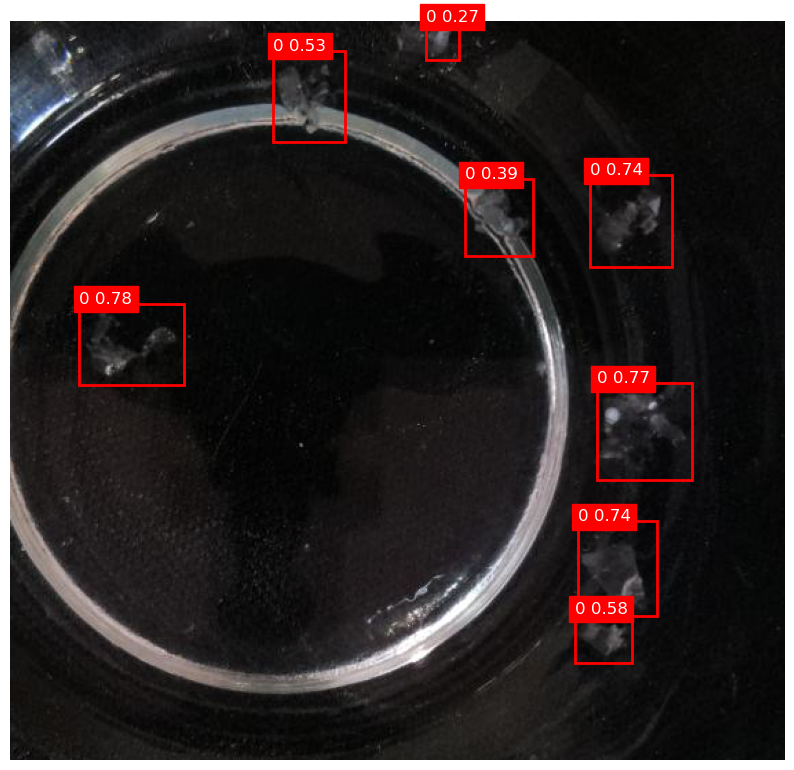


image 1/1 /Users/abdullah/Desktop/Abha hackathon/data/images/valid/c--191-_jpg.rf.3b56030b7ce84cace21b3bfe5ea58827.jpg: 1248x1280 8 Microplastics, 59.8ms
Speed: 6.3ms preprocess, 59.8ms inference, 53.6ms postprocess per image at shape (1, 3, 1248, 1280)


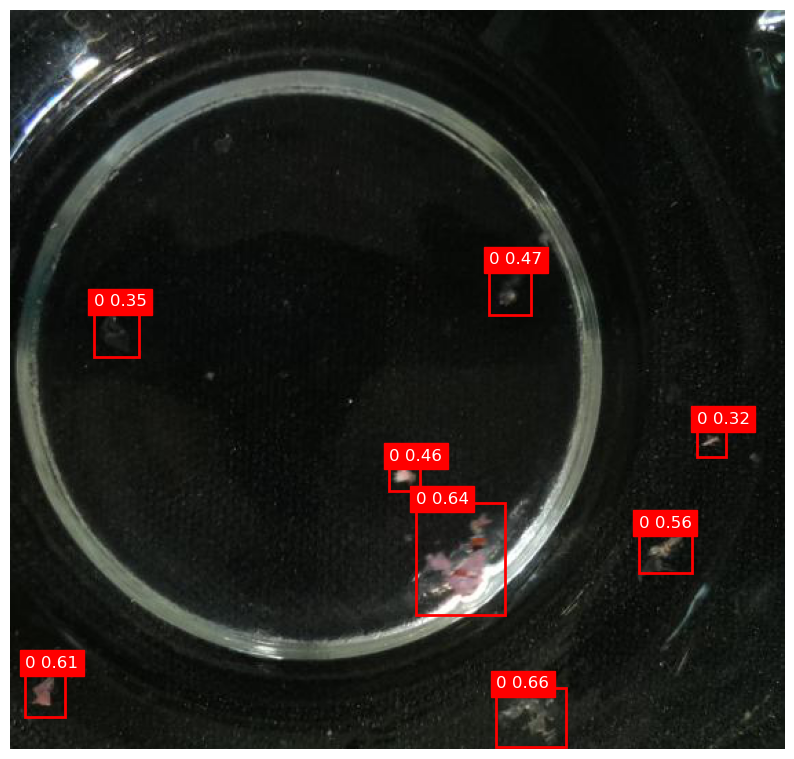

In [21]:
def visualize_predictions(results, img_path):
    img = plt.imread(img_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    
    for box in results[0].boxes:
        # Extract the bounding box coordinates, confidence, and label as scalar values
        x_min, y_min, x_max, y_max = box.xyxy[0].cpu().numpy()
        confidence = box.conf.cpu().numpy().item()  # Use .item() to extract the scalar
        label = int(box.cls.cpu().numpy().item())  # Use .item() and int() to extract the scalar

        # Create a rectangle patch
        rect = patches.Rectangle(
            (x_min, y_min), 
            x_max - x_min, 
            y_max - y_min, 
            linewidth=2, 
            edgecolor='r', 
            facecolor='none'
        )

        # Add the patch to the Axes
        plt.gca().add_patch(rect)
        plt.text(x_min, y_min, f'{label} {confidence:.2f}', color='white', fontsize=12, backgroundcolor='red')

    plt.axis('off')
    plt.show()



# Visualize predictions for each image in the validation set
for img_path in val_filename[:5]:  
    img_full_path = os.path.join(val_dir, img_path)
    results = pretrained_model.predict(source=img_full_path, device=mps_device)
    visualize_predictions(results, img_full_path)
